In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file1 = 'C:\\Users\\loveleenarora\\Desktop\\machine-learning-ex1\\machine-learning-ex1\\ex1\\ex1data1.txt'
data = np.loadtxt(file1,delimiter=',')

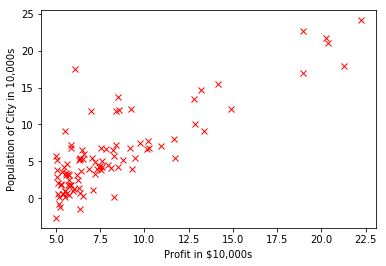

In [8]:
#Plotting
x, y = data[:,0], data[:,1]
plt.plot(x,y,'xr');
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s');

In [9]:
#Cost function
def computeCost(X,y,theta):
    h = np.dot(X, theta) - y
    return np.dot(h,h)/2/m

In [11]:
m = len(y) #training examples
X = np.ones((m,2))
X[:,1] = data[:,0]
theta = np.zeros(2)

In [12]:
computeCost(X,y,theta)

32.07273387745567

In [13]:
#Gradient descent
def GradientDescent(X,y,theta,iterations,alpha):
    J_initial = np.zeros(iterations)
    theta_new = theta.copy()
    for i in range(iterations):
        theta_new -= alpha * np.dot(X.T, (np.dot(X,theta_new) - y)) / m
        J_initial[i] = computeCost(X,y,theta_new)
    return theta_new,J_initial

In [14]:
iterations = 1500;
alpha = 0.01;

In [15]:
#run GradientDescent
theta_new, J_initial = GradientDescent(X, y, theta, iterations, alpha)
theta_new

array([-3.63029144,  1.16636235])

Text(0,0.5,'Cost function')

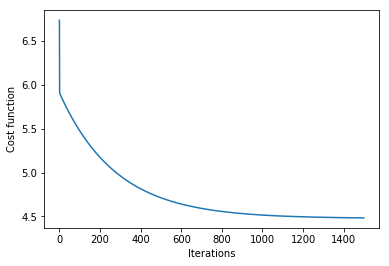

In [16]:
plt.plot(J_initial)
plt.xlabel('Iterations')
plt.ylabel('Cost function')

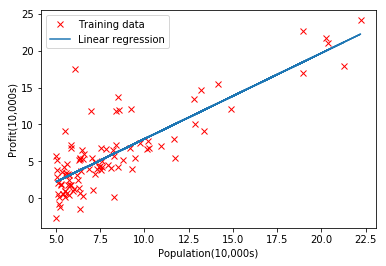

In [17]:
#Plot the linear fit
plt.plot(x,y,'xr',label = 'Training data')
plt.plot(x,np.dot(X,theta_new),label = 'Linear regression')
plt.xlabel('Population(10,000s)')
plt.ylabel('Profit(10,000s)')
plt.legend(loc = 'best');

In [18]:
#Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5],theta_new)
predict2 = np.dot([1, 7],theta_new)
print(predict1*10000)
print(predict2*10000)

4519.7678677017675
45342.45012944714


In [19]:
#Visualizing J(theta_0, theta_1)
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = computeCost(X, y, t)

J_vals =J_vals.T

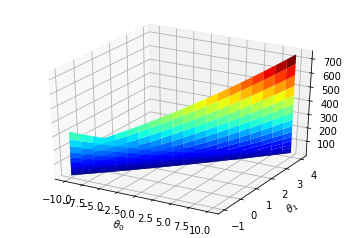

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection = '3d')
T0,T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap = 'jet',rstride = 5,cstride = 5)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$');